# Imports

In [ ]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Tuple, Dict

_ = sns.set_style('whitegrid')

# Functions

In [ ]:
def plot_log_joint_trace(log_probs_trace: List[float], figsize: Tuple[int, int]=(4, 3)) -> None:
    """Plot log-joint trace."""
    df_plot = pd.DataFrame({
        "iteration": np.arange(len(log_probs_trace)),
        "log_prob": log_probs_trace
    })
    f, ax = plt.subplots(1, 1, figsize=(4, 3))
    _ = sns.lineplot(data=df_plot, x="iteration", y="log_prob", color="C0", ax=ax)
    _ = ax.set_xlabel("Iteration")
    _ = ax.set_ylabel("Collapsed log joint")
    _ = ax.set_title("Log-joint trace (convergence check)")


def plot_class_counts_trace(class_counts_trace: List[np.ndarray], figsize: Tuple[int, int]=(4, 3)) -> None:
    """Plot class count trace."""
    x_class_counts_trace = np.stack(class_counts_trace, axis=0)  # shape (T, n_classes)
        
    df_plot = (
        pd.DataFrame(x_class_counts_trace, columns=[f"class_{z}" for z in range(x_class_counts_trace.shape[1])])
        .assign(iteration=np.arange(len(x_class_counts_trace)))
        .melt(id_vars="iteration", var_name="class", value_name="count")
    )
    f, ax = plt.subplots(1, 1, figsize=figsize)
    _ = sns.lineplot(data=df_plot, x="iteration", y="count", hue="class", palette="husl", linewidth=1, ax=ax)
    _ = ax.set_xlabel("Iteration")
    _ = ax.set_ylabel("Cnt word types in class")
    _ = ax.set_title("Class size trace")

    
def plot_word_type_posterior(
    sampler: GibbsSampler,
    samples: List[np.ndarray],
    word: str,
    wordtype_to_ix: Dict[str, int],
    n_classes: int,
    ax: plt.Axes,
    title: str,
    figsize: Tuple[int, int]=(4, 3)
    ) -> None:
    """Plot word type posterior probabilities."""
    posterior_probs: np.ndarray = sampler.compute_posterior_class_probs(samples, wordtype_to_ix[word])
    
    df_plot = pd.DataFrame({
        "class": np.arange(n_classes),
        "probability": posterior_probs
    
    })

    if ax is None: f, ax = plt.subplots(1, 1, figsize=figsize)
    _ = sns.barplot(data=df_plot, x="class", y="probability", ax=ax)
    title: str = f"Posterior class probabilities for word '{ix_to_wordtype[word_ix]}'" if title is None else title
    _ = ax.set_title(title)
    _ = ax.set_xlabel("")
    _ = ax.set_ylabel("")

# Load artifacts

In [31]:
alpha, beta_left, beta_right = .1, .5, .5

path_input_preprocess = f'outputs/preprocess'
path_input_train = f'outputs/train/alpha={alpha}_beta_left={beta_left}_beta_right={beta_right}'

log_probs_trace = joblib.load(f'{path_input_train}/log_probs_trace.joblib')
class_counts_trace = joblib.load(f'{path_input_train}/class_counts_trace.joblib')
samples = joblib.load(f'{path_input_train}/samples.joblib')
x_word_type_posterior_probs = joblib.load(f'{path_input_train}/x_word_type_posterior_probs.joblib')
counter = joblib.load(f'{path_input_preprocess}/counter.joblib')
wordtype_to_ix = joblib.load(f'{path_input_preprocess}/wordtype_to_ix.joblib')
ix_to_wordtype = joblib.load(f'{path_input_preprocess}/ix_to_wordtype.joblib')
# sampler = joblib.load(f'{path_input_train}/sampler.joblib')

# Plot

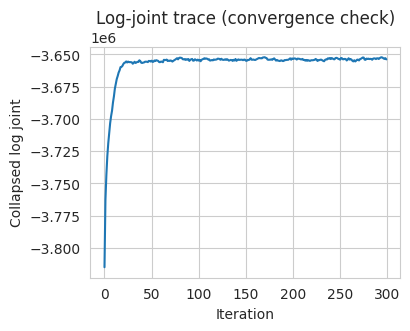

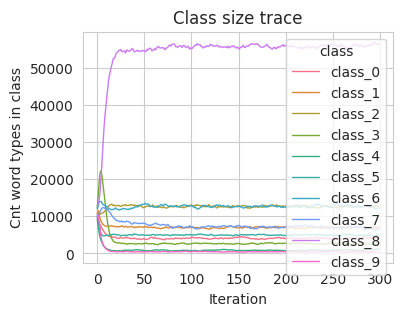

In [32]:
plot_log_joint_trace(log_probs_trace=log_probs_trace)
plot_class_counts_trace(class_counts_trace=class_counts_trace)

In [1]:
# n_most_common = 10

# words: List[str] = [x for x, _ in counter.most_common(n_most_common)]
# f, axs = plt.subplots(1, n_most_common, figsize=(13, 2), sharex=True, sharey=True)
# for w, ax in zip(words, axs):
#     _ = plot_word_type_posterior(samples=samples, word=w, wordtype_to_ix=wordtype_to_ix, n_classes=class_counts_trace[0].__len__(), ax=ax, title=w)
#     _ = plt.ylim(0, 1)


# words: List[str] = [x for x, _ in counter.most_common()[::-1][:n_most_common]]
# f, axs = plt.subplots(1, n_most_common, figsize=(13, 2), sharex=True, sharey=True)
# for w, ax in zip(words, axs):
#     _ = plot_word_type_posterior(samples=samples, word=w, wordtype_to_ix=wordtype_to_ix, n_classes=class_counts_trace[0].__len__(), ax=ax, title=w)
#     _ = plt.ylim(0, 1)